<a href="https://colab.research.google.com/github/saimasharleen/thyroid-dataset/blob/main/thyroid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connecting Google Drive with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/Thyroid cancer/dataset/sick-euthyroid.data')

In [ ]:
#adding the columns name
data.columns = ['sclass','age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

In [ ]:
!pip install catboost

In [ ]:
# import main libraries
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from  xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from scipy import stats
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
import lightgbm as lgb

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data.head()

,sclass,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,45,F,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?
1,sick-euthyroid,64,F,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?
2,sick-euthyroid,56,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?
3,sick-euthyroid,78,F,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?
4,sick-euthyroid,80,M,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?


In [ ]:
display(data.head(10))

,sclass,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,45,F,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?
1,sick-euthyroid,64,F,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?
2,sick-euthyroid,56,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?
3,sick-euthyroid,78,F,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?
4,sick-euthyroid,80,M,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?
5,sick-euthyroid,74,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,?
6,sick-euthyroid,?,F,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,?
7,sick-euthyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,?
8,sick-euthyroid,89,M,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,?
9,sick-euthyroid,73,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,?


In [ ]:
display(data.dtypes)

sclass                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
data['sclass'] = data.pop('sclass')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3162 non-null   object
 1   sex                        3162 non-null   object
 2   on_thyroxine               3162 non-null   object
 3   query_on_thyroxine         3162 non-null   object
 4   on_antithyroid_medication  3162 non-null   object
 5   thyroid_surgery            3162 non-null   object
 6   query_hypothyroid          3162 non-null   object
 7   query_hyperthyroid         3162 non-null   object
 8   pregnant                   3162 non-null   object
 9   sick                       3162 non-null   object
 10  tumor                      3162 non-null   object
 11  lithium                    3162 non-null   object
 12  goitre                     3162 non-null   object
 13  TSH_measured               3162 non-null   object
 14  TSH     

In [ ]:
data['sex'] = data['sex'].map({'F': 1, 'M': 0})

In [ ]:
display(data.shape)
display(data.head(10))
display(data.dtypes)

(3162, 26)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sclass
0,45,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?,sick-euthyroid
1,64,1.0,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?,sick-euthyroid
2,56,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?,sick-euthyroid
3,78,1.0,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?,sick-euthyroid
4,80,0.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?,sick-euthyroid
5,74,1.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,?,sick-euthyroid
6,?,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,?,sick-euthyroid
7,42,1.0,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,?,sick-euthyroid
8,89,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,?,sick-euthyroid
9,73,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,?,sick-euthyroid


age                           object
sex                          float64
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                           object
T3_measured                   object
T3                            object
TT4_measured                  object
TT4                           object
T4U_measured                  object
T4U                           object
FTI_measured                  object
FTI                           object
TBG_measured                  object
TBG                           object
sclass                        object
dtype: object

In [ ]:

display(data.shape)

(3162, 26)

In [ ]:
print("Sick-euthyroid:")
sex_series2 = pd.Series(data[data.columns[1]].values)
display(sex_series2.value_counts())


Sick-euthyroid:


1.0    2182
0.0     907
dtype: int64

In [ ]:
#start the data pre processing observing the set of possible values for each attribute
for column in data.columns:
    listOfValues=set(data[column])
    print(column,": ",listOfValues)

age :  {'4', '75', '22', '15', '50', '86', '92', '44', '98', '80', '74', '10', '?', '84', '56', '57', '53', '18', '9', '82', '51', '16', '29', '36', '37', '81', '1', '38', '52', '42', '20', '11', '89', '41', '13', '54', '73', '79', '68', '32', '62', '87', '45', '48', '17', '34', '28', '85', '31', '78', '76', '5', '93', '69', '61', '8', '77', '14', '47', '27', '49', '58', '40', '7', '25', '43', '55', '67', '19', '46', '88', '70', '23', '12', '90', '39', '26', '63', '64', '24', '33', '6', '21', '72', '83', '65', '71', '59', '30', '66', '35', '97', '60'}
sex :  {0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
on_thyroxine :  {'f', 't'}
query_on_thyroxine :  {'f', 't'}

In [ ]:
data=data.replace({"?":np.NAN})
data.isna().sum()

age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           467
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2902
sclass                          0
dtype: int64

In [ ]:
del data['TBG']

In [ ]:
data['age'].fillna(value=data['age'].median(), inplace=True)

In [ ]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          467
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
sclass                         0
dtype: int64

In [ ]:
#data[['age','TSH','T3','TT4','T4U','FTI']].boxplot()

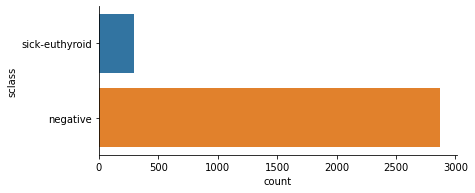

In [ ]:
ax = sns.catplot(y='sclass', kind='count', data=data, height=2.6, aspect=2.5)

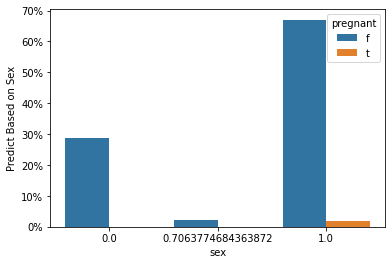

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="Predict Based on Sex"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["pregnant"].value_counts().to_frame()
    g = g.rename({"pregnant": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='pregnant', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='pregnant', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("sex")

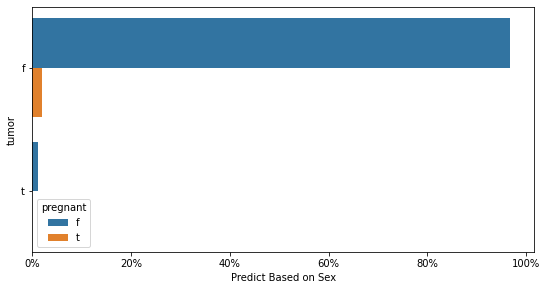

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("tumor", orient='h')

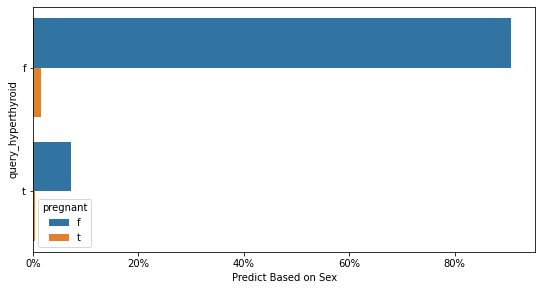

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("query_hyperthyroid", orient='h')

In [ ]:
data.shape
display(data.head(10))

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,sclass
0,45,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,sick-euthyroid
1,64,1.0,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,sick-euthyroid
2,56,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,sick-euthyroid
3,78,1.0,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,sick-euthyroid
4,80,0.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,sick-euthyroid
5,74,1.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,sick-euthyroid
6,54,1.0,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,sick-euthyroid
7,42,1.0,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,sick-euthyroid
8,89,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,sick-euthyroid
9,73,0.0,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,96,y,0.89,y,108,n,sick-euthyroid


In [ ]:
#For the classification is important that the dataset only has numerical attributes, so I have to encode the categorical values into numerical values
data = data.replace({"t":1,"f":0, "y":1, "n":0, "sick-euthyroid":1, "negative":0,"F":1, "M":0})
display(data.dtypes)

age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
sclass                         int64
dtype: object

In [ ]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
display(data.dtypes)

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
sclass                         int64
dtype: object

In [ ]:

# Before the training starts, finding the attributes most related to the target
corr_values = abs(data[data.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
display(corr_values.sort_values())


tumor                        0.006782
lithium                      0.008025
query_on_thyroxine           0.009016
thyroid_surgery              0.009825
FTI                          0.025210
query_hypothyroid            0.025753
on_antithyroid_medication    0.027466
goitre                       0.038527
pregnant                     0.045479
query_hyperthyroid           0.055121
sex                          0.055874
TSH                          0.056549
on_thyroxine                 0.085346
FTI_measured                 0.092850
T4U_measured                 0.093053
TT4_measured                 0.093257
TBG_measured                 0.095475
TSH_measured                 0.126621
TT4                          0.127213
T3_measured                  0.169301
age                          0.192396
sick                         0.193554
T4U                          0.220305
T3                           0.382726
Name: sclass, dtype: float64

In [ ]:

# Before the training starts, finding the attributes most related to the target
corr_values = abs(data[data.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

age                   0.192396
sex                   0.055874
on_thyroxine          0.085346
query_hyperthyroid    0.055121
pregnant              0.045479
sick                  0.193554
TSH_measured          0.126621
TSH                   0.056549
T3_measured           0.169301
T3                    0.382726
TT4_measured          0.093257
TT4                   0.127213
T4U_measured          0.093053
T4U                   0.220305
FTI_measured          0.092850
TBG_measured          0.095475
Name: sclass, dtype: float64

In [ ]:
#dividing the dataset into two sets: the training set and the testing set
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['sclass']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(data)

In [ ]:
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    "CatBoostClassifier" : CatBoostClassifier(max_depth=4,verbose=0)
}

Confusion matrix for:  XGBClassifier


array([[831,  14],
       [ 26,  78]])

roc_auc_score:  0.9583238507055074


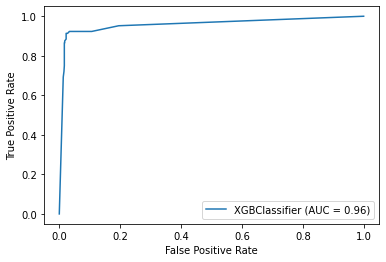

Confusion matrix for:  CatBoostClassifier


array([[832,  13],
       [ 19,  85]])

roc_auc_score:  0.9826695493855258


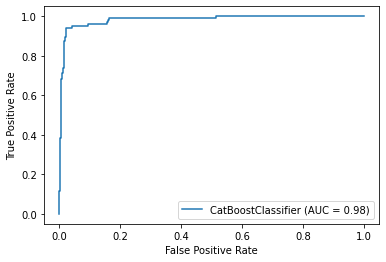

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9114,CatBoostClassifier,0.9663,0.9225,0.9010
0.8862,XGBClassifier,0.9579,0.9087,0.8667


In [ ]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import roc_auc_score
def classification(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "FScore"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "FScore":round(fs, 4)}, ignore_index=True)
            print("Confusion matrix for: ", name)
            display(confusion_matrix(y_test, y_pred))
            #X_train, X_test, y_train, y_test = holdout(data)
            #lf = CatBoostClassifier(max_depth=4,verbose=0)
            #clf.fit(X_train1, y_train1)
            # Getting predicted probabilities
            y_score1 = clf.predict_proba(X_test)[:,1]
            y_score2 = clf.predict_proba(X_test)[:,1]
            print('roc_auc_score: ', roc_auc_score(y_test, y_score1))
            #SVC(random_state=0)
            metrics.plot_roc_curve(clf, X_test, y_test)  
            plt.show()
  res.set_index("FScore", inplace=True)
  res.sort_values(by="FScore", ascending=False, inplace=True)   
  return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

In [ ]:
display(data.shape)
data.sclass.value_counts()

(3162, 25)

0    2870
1     292
Name: sclass, dtype: int64

In [ ]:
#fill the nan values with the spline interpolation
data1 = data.interpolate(method = 'spline', order = 3)
display(data1.isna().sum())

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
sclass                       0
dtype: int64

In [ ]:
classifiers1 = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01),
    "CatBoostClassifier" : CatBoostClassifier(max_depth=4,verbose=0),
    "Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced',random_state = 1),
    "ExtraTrees": ExtraTreesClassifier(class_weight = 'balanced',random_state = 1),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1),
    "Naive Bayes" : GaussianNB(),
    "LGBMClassifier" : lgb.LGBMClassifier(),
    "svc": SVC(probability=True)
}

age                   0.192396
sex                   0.055874
on_thyroxine          0.085346
query_hyperthyroid    0.055121
pregnant              0.045479
sick                  0.193554
TSH_measured          0.126621
TSH                   0.048216
T3_measured           0.169301
T3                    0.384877
TT4_measured          0.093257
TT4                   0.121423
T4U_measured          0.093053
T4U                   0.221054
FTI_measured          0.092850
TBG_measured          0.095475
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[831,  14],
       [ 24,  80]])

roc_auc_score:  0.9484922621756942


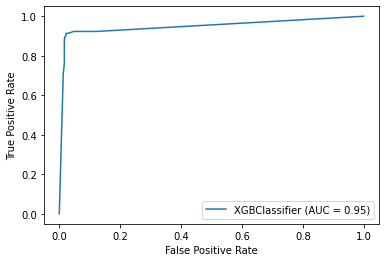

Confusion matrix for:  CatBoostClassifier


array([[833,  12],
       [ 19,  85]])

roc_auc_score:  0.9819185252617205


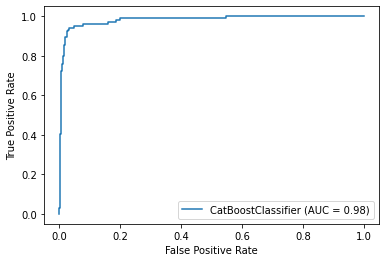

Confusion matrix for:  Nearest Neighbors


array([[838,   7],
       [ 92,  12]])

roc_auc_score:  0.7062187073281747


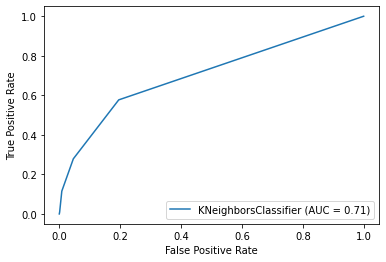

Confusion matrix for:  Decision Tree


array([[825,  20],
       [ 21,  83]])

roc_auc_score:  0.8872041420118343


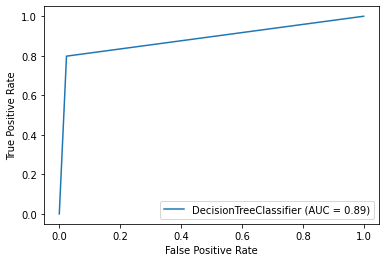

Confusion matrix for:  Random Forest


array([[835,  10],
       [ 17,  87]])

roc_auc_score:  0.9760411925352754


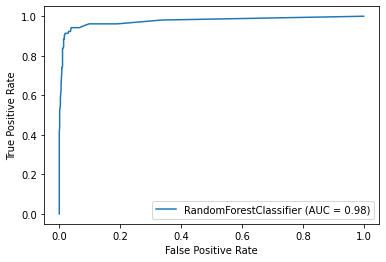

Confusion matrix for:  ExtraTrees


array([[836,   9],
       [ 33,  71]])

roc_auc_score:  0.9633022303140646


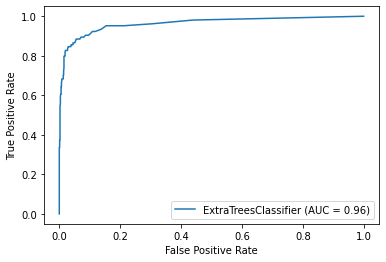

Confusion matrix for:  MLPClassifier


array([[826,  19],
       [ 19,  85]])

roc_auc_score:  0.9615725989986346


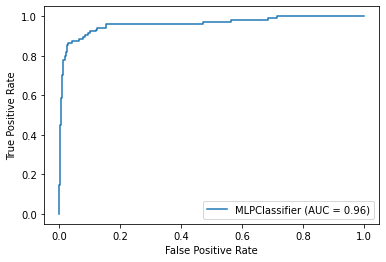

Confusion matrix for:  Naive Bayes


array([[277, 568],
       [  2, 102]])

roc_auc_score:  0.8186504324078288


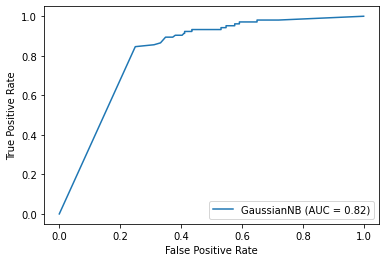

Confusion matrix for:  LGBMClassifier


array([[831,  14],
       [ 19,  85]])

roc_auc_score:  0.97212107419208


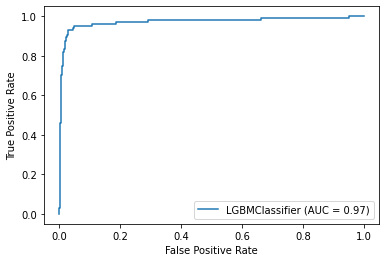

Confusion matrix for:  svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[845,   0],
       [104,   0]])

roc_auc_score:  0.9595584888484296


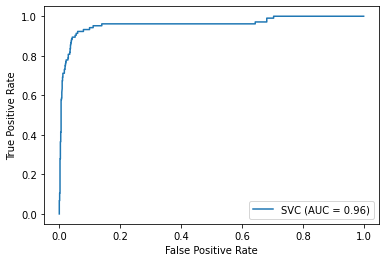

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9249,Random Forest,0.9715,0.9385,0.9124
0.9138,CatBoostClassifier,0.9673,0.9270,0.9016
0.9090,LGBMClassifier,0.9652,0.9181,0.9004
0.8974,MLPClassifier,0.9600,0.8974,0.8974
0.8929,XGBClassifier,0.9600,0.9115,0.8763
0.8888,Decision Tree,0.9568,0.8905,0.8872
0.8736,ExtraTrees,0.9557,0.9248,0.8360
0.5697,Nearest Neighbors,0.8957,0.7663,0.5536
0.4710,svc,0.8904,0.4452,0.5000


In [ ]:
corr_values = abs(data1[data1.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train1, X_test1, y_train1, y_test1 = holdout(data1)

display(classification(classifiers1,X_train1, X_test1, y_train1, y_test1))

In [ ]:
def fdiscretizer(attribute,dataframe):
    enc = LabelEncoder()
    dataframe[attribute] = pd.qcut(dataframe[attribute], 20, duplicates='drop')
    dataframe[attribute] = enc.fit_transform(dataframe[attribute])
    dataframe = dataframe.convert_dtypes(convert_integer=True)

data2 = data1.copy()
fdiscretizer('age',data2)
fdiscretizer('TSH',data2)
fdiscretizer('T3',data2)
fdiscretizer('TT4',data2)
fdiscretizer('T4U',data2)
fdiscretizer('FTI',data2)

age                   0.192984
sex                   0.055874
on_thyroxine          0.085346
query_hyperthyroid    0.055121
pregnant              0.045479
sick                  0.193554
TSH_measured          0.126621
TSH                   0.043371
T3_measured           0.169301
T3                    0.430705
TT4_measured          0.093257
TT4                   0.151849
T4U_measured          0.093053
T4U                   0.264928
FTI_measured          0.092850
TBG_measured          0.095475
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[836,   9],
       [ 29,  75]])

roc_auc_score:  0.9488962221210742


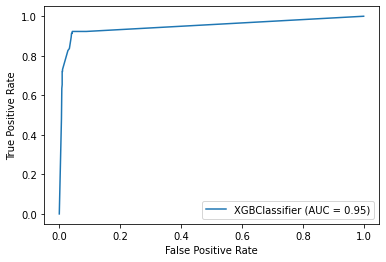

Confusion matrix for:  CatBoostClassifier


array([[835,  10],
       [ 25,  79]])

roc_auc_score:  0.9760582612653619


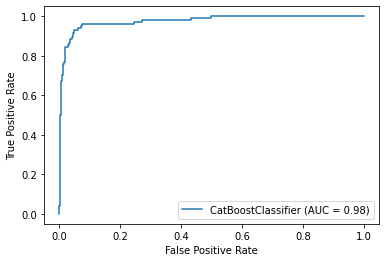

Confusion matrix for:  Nearest Neighbors


array([[841,   4],
       [ 53,  51]])

roc_auc_score:  0.917523896222121


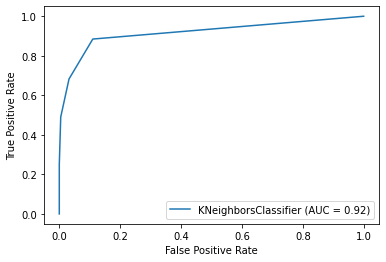

Confusion matrix for:  Decision Tree


array([[824,  21],
       [ 28,  76]])

roc_auc_score:  0.8529585798816569


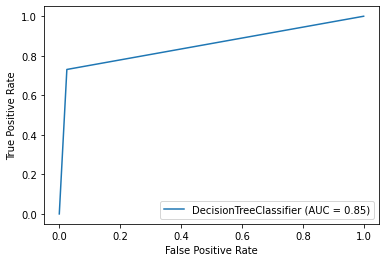

Confusion matrix for:  Random Forest


array([[837,   8],
       [ 31,  73]])

roc_auc_score:  0.9682635411925352


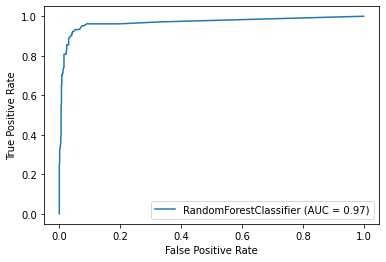

Confusion matrix for:  ExtraTrees


array([[836,   9],
       [ 38,  66]])

roc_auc_score:  0.9668866636322258


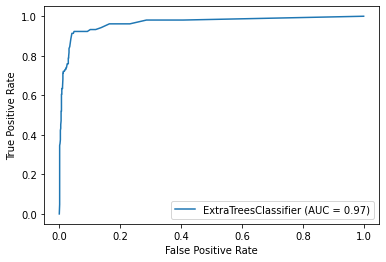

Confusion matrix for:  MLPClassifier


array([[822,  23],
       [ 31,  73]])

roc_auc_score:  0.9464610832954028


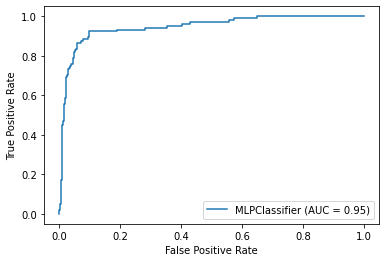

Confusion matrix for:  Naive Bayes


array([[235, 610],
       [  2, 102]])

roc_auc_score:  0.707925580336823


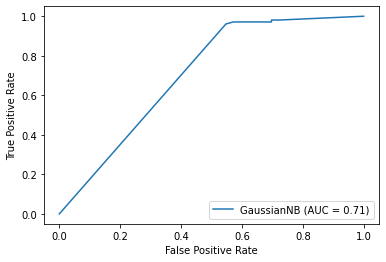

Confusion matrix for:  LGBMClassifier


array([[830,  15],
       [ 26,  78]])

roc_auc_score:  0.961185707783341


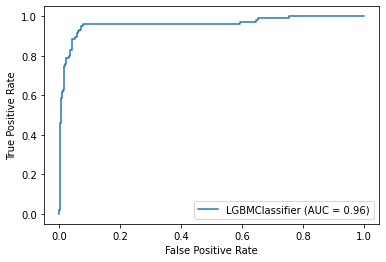

Confusion matrix for:  svc


array([[837,   8],
       [ 46,  58]])

roc_auc_score:  0.9500170687300864


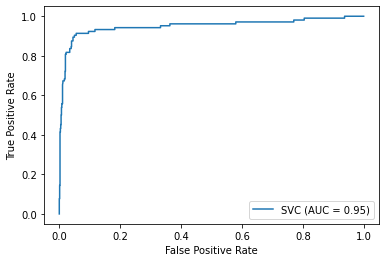

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.8991,CatBoostClassifier,0.9631,0.9293,0.8739
0.8878,XGBClassifier,0.9600,0.9297,0.8553
0.8839,LGBMClassifier,0.9568,0.9042,0.8661
0.8832,Random Forest,0.9589,0.9328,0.8462
0.8637,Decision Tree,0.9484,0.8753,0.8530
0.8550,ExtraTrees,0.9505,0.9183,0.8120
0.8491,MLPClassifier,0.9431,0.8620,0.8374
0.8256,svc,0.9431,0.9133,0.7741
0.8044,Nearest Neighbors,0.9399,0.9340,0.7428


In [ ]:
corr_values = abs(data2[data2.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train2, X_test2, y_train2, y_test2 = holdout(data2)

display(classification(classifiers1,X_train2, X_test2, y_train2, y_test2))

age                   0.192396
sex                   0.055874
on_thyroxine          0.085346
query_hyperthyroid    0.055121
pregnant              0.045479
sick                  0.193554
TSH_measured          0.126621
TSH                   0.048216
T3_measured           0.169301
T3                    0.384877
TT4_measured          0.093257
TT4                   0.121423
T4U_measured          0.093053
T4U                   0.221054
FTI_measured          0.092850
TBG_measured          0.095475
Name: sclass, dtype: float64

Confusion matrix for:  XGBClassifier


array([[831,  14],
       [ 24,  80]])

roc_auc_score:  0.9484922621756942


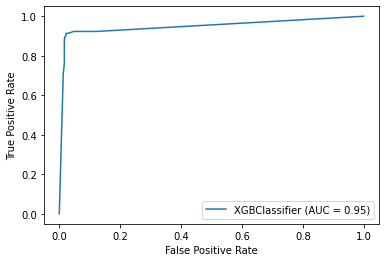

Confusion matrix for:  CatBoostClassifier


array([[833,  12],
       [ 19,  85]])

roc_auc_score:  0.9819185252617205


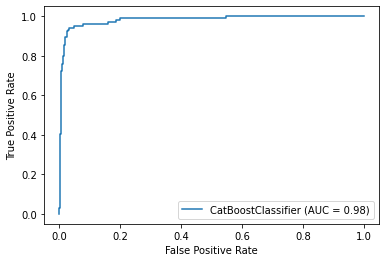

Confusion matrix for:  Nearest Neighbors


array([[836,   9],
       [ 64,  40]])

roc_auc_score:  0.8590748748293127


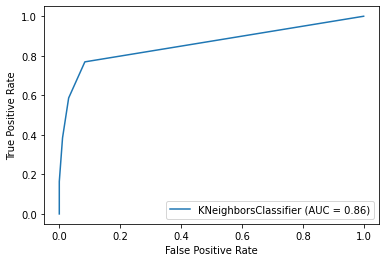

Confusion matrix for:  Decision Tree


array([[826,  19],
       [ 23,  81]])

roc_auc_score:  0.8781804733727809


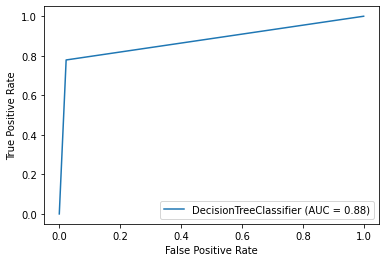

Confusion matrix for:  Random Forest


array([[835,  10],
       [ 17,  87]])

roc_auc_score:  0.9759501593081474


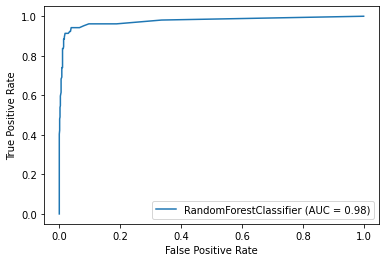

Confusion matrix for:  ExtraTrees


array([[836,   9],
       [ 33,  71]])

roc_auc_score:  0.9633022303140646


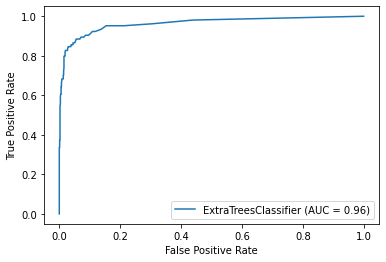

Confusion matrix for:  MLPClassifier


array([[833,  12],
       [ 27,  77]])

roc_auc_score:  0.9460172963131542


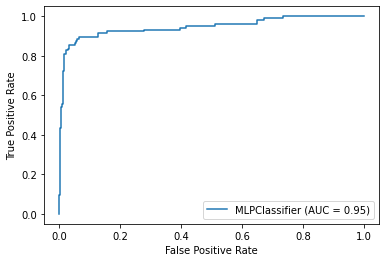

Confusion matrix for:  Naive Bayes


array([[257, 588],
       [  2, 102]])

roc_auc_score:  0.6544037323623122


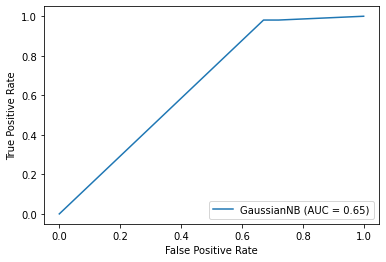

Confusion matrix for:  LGBMClassifier


array([[833,  12],
       [ 19,  85]])

roc_auc_score:  0.9725421028675467


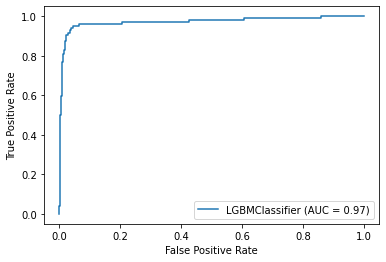

Confusion matrix for:  svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[845,   0],
       [104,   0]])

roc_auc_score:  0.9384387801547565


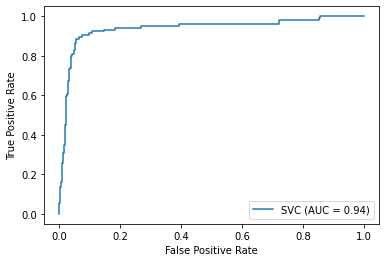

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9249,Random Forest,0.9715,0.9385,0.9124
0.9138,CatBoostClassifier,0.9673,0.9270,0.9016
0.9138,LGBMClassifier,0.9673,0.9270,0.9016
0.8929,XGBClassifier,0.9600,0.9115,0.8763
0.8875,MLPClassifier,0.9589,0.9169,0.8631
0.8847,Decision Tree,0.9557,0.8915,0.8782
0.8736,ExtraTrees,0.9557,0.9248,0.8360
0.7405,Nearest Neighbors,0.9231,0.8726,0.6870
0.4710,svc,0.8904,0.4452,0.5000


In [ ]:
data3 = ((data1-data1.min())/(data1.max()-data1.min()))*20

corr_values = abs(data3[data3.columns[0:]].corr()['sclass'][:])
corr_values = corr_values.drop('sclass')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

X_train3, X_test3, y_train3, y_test3 = holdout(data3)

display(classification(classifiers1,X_train3, X_test3, y_train3, y_test3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(2213, 16)

(4050, 16)

Confusion matrix for:  XGBClassifier


array([[821,  24],
       [ 55, 790]])

roc_auc_score:  0.9710598368404468


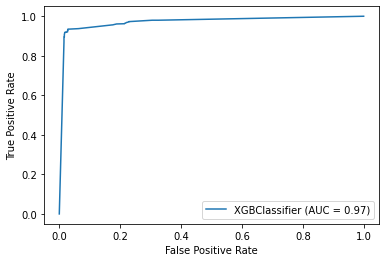

Confusion matrix for:  CatBoostClassifier


array([[827,  18],
       [ 60, 785]])

roc_auc_score:  0.9894793599663877


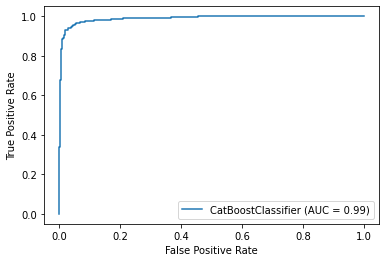

Confusion matrix for:  Nearest Neighbors


array([[794,  51],
       [182, 663]])

roc_auc_score:  0.8945233010048668


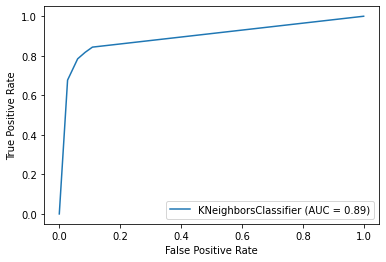

Confusion matrix for:  Decision Tree


array([[821,  24],
       [ 72, 773]])

roc_auc_score:  0.9431952662721894


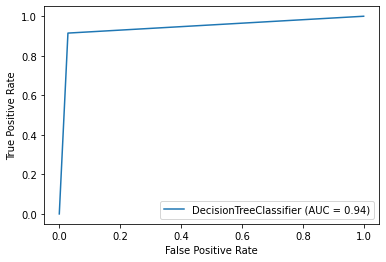

Confusion matrix for:  Random Forest


array([[828,  17],
       [ 71, 774]])

roc_auc_score:  0.9879843142747103


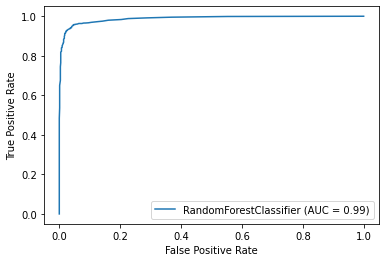

Confusion matrix for:  ExtraTrees


array([[827,  18],
       [133, 712]])

roc_auc_score:  0.9748713280347328


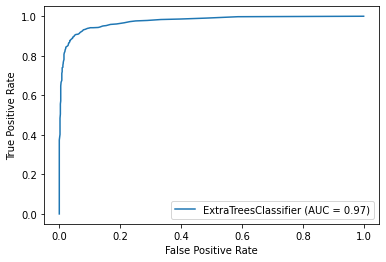

Confusion matrix for:  MLPClassifier


array([[806,  39],
       [118, 727]])

roc_auc_score:  0.9600084030671195


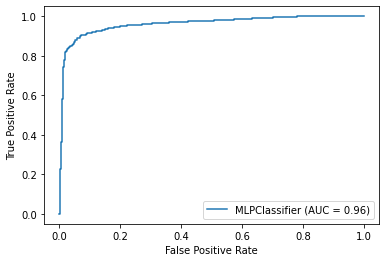

Confusion matrix for:  Naive Bayes


array([[273, 572],
       [ 18, 827]])

roc_auc_score:  0.6750814047127202


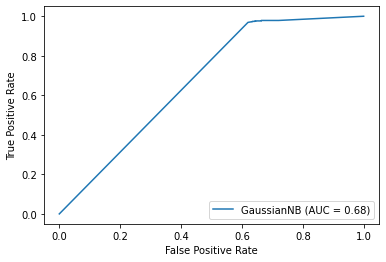

Confusion matrix for:  LGBMClassifier


array([[827,  18],
       [ 74, 771]])

roc_auc_score:  0.9878050488428276


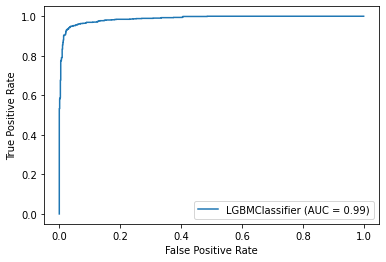

Confusion matrix for:  svc


array([[742, 103],
       [ 73, 772]])

roc_auc_score:  0.9576723504078989


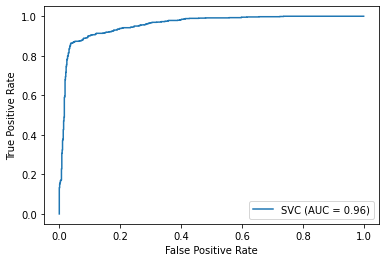

,Classifier,Accuracy,Precision,Recall
FScore,,,,
0.9538,CatBoostClassifier,0.9538,0.9550,0.9538
0.9532,XGBClassifier,0.9533,0.9539,0.9533
0.9479,Random Forest,0.9479,0.9498,0.9479
0.9455,LGBMClassifier,0.9456,0.9475,0.9456
0.9431,Decision Tree,0.9432,0.9446,0.9432
0.9102,ExtraTrees,0.9107,0.9184,0.9107
0.9069,MLPClassifier,0.9071,0.9107,0.9071
0.8958,svc,0.8959,0.8964,0.8959
0.8613,Nearest Neighbors,0.8621,0.8710,0.8621


In [ ]:
smote = SMOTE('not majority',random_state = 1)
X_train_sm, y_train_sm = smote.fit_sample(X_train3,y_train3)
X_test_sm, y_test_sm = smote.fit_sample(X_test3,y_test3)
display(X_train3.shape)
display(X_train_sm.shape)
display(classification(classifiers1,X_train_sm, X_test_sm, y_train_sm, y_test_sm))